In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import seaborn as sns

In [13]:
data = pd.read_csv('../data/ccf_offline_stage1_train.csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1754884 entries, 0 to 1754883
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   User_id        int64  
 1   Merchant_id    int64  
 2   Coupon_id      float64
 3   Discount_rate  object 
 4   Distance       float64
 5   Date_received  float64
 6   Date           float64
dtypes: float64(4), int64(2), object(1)
memory usage: 93.7+ MB


,User_id,Merchant_id,Coupon_id,Distance,Date_received,Date
count,1.754884e+06,1.754884e+06,1.053282e+06,1.648881e+06,1.053282e+06,7.769840e+05
mean,3.689255e+06,4.038808e+03,6.815398e+03,2.361636e+00,2.016032e+07,2.016040e+07
std,2.123428e+06,2.435963e+03,4.174276e+03,3.483974e+00,1.771416e+02,1.621500e+02
min,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.016010e+07,2.016010e+07
25%,1.845052e+06,1.983000e+03,2.840000e+03,0.000000e+00,2.016013e+07,2.016031e+07
50%,3.694446e+06,3.532000e+03,7.430000e+03,0.000000e+00,2.016032e+07,2.016042e+07
75%,5.528759e+06,6.329000e+03,1.032300e+04,3.000000e+00,2.016051e+07,2.016052e+07
max,7.361032e+06,8.856000e+03,1.404500e+04,1.000000e+01,2.016062e+07,2.016063e+07


In [27]:
data.head(5)

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
6,1439408,2632,8591.0,1,0.0,20160516.0,20160613.0
33,1113008,1361,11166.0,1,0.0,20160515.0,20160521.0
38,2881376,8390,7531.0,1,0.0,20160321.0,20160329.0
69,114747,6901,2366.0,1,0.0,20160523.0,20160605.0
75,114747,5341,111.0,1,0.0,20160127.0,20160221.0


## Preprocessing

In [15]:
data = data.dropna(how='any')

In [23]:
data['Discount_rate'] = data['Discount_rate'].apply(lambda x: 1 if ':' in x else 0)

In [28]:
data.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
6,1439408,2632,8591.0,1,0.0,20160516.0,20160613.0
33,1113008,1361,11166.0,1,0.0,20160515.0,20160521.0
38,2881376,8390,7531.0,1,0.0,20160321.0,20160329.0
69,114747,6901,2366.0,1,0.0,20160523.0,20160605.0
75,114747,5341,111.0,1,0.0,20160127.0,20160221.0


用户在领取优惠券之后 15 之内的消费情况

(Date - Date_received <= 15) 表示领取优惠券且在15天内使用，即正样本，y = 1
(Date - Date_received > 15) 表示领取优惠券未在15天内使用，即负样本，y = 0

In [32]:
data['label'] = (pd.to_datetime(data['Date'], format='%Y%m%d') - pd.to_datetime(data['Date_received'], format='%Y%m%d')).apply(lambda x: 1 if x <= pd.Timedelta(15, 'D') else 0)
data

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,label
6,1439408,2632,8591.0,1,0.0,20160516.0,20160613.0,0
33,1113008,1361,11166.0,1,0.0,20160515.0,20160521.0,1
38,2881376,8390,7531.0,1,0.0,20160321.0,20160329.0,1
69,114747,6901,2366.0,1,0.0,20160523.0,20160605.0,1
75,114747,5341,111.0,1,0.0,20160127.0,20160221.0,0
...,...,...,...,...,...,...,...,...
1754833,1437872,7706,416.0,1,4.0,20160129.0,20160202.0,1
1754873,212662,2934,5686.0,1,2.0,20160321.0,20160330.0,1
1754877,212662,3021,3739.0,1,6.0,20160504.0,20160508.0,1
1754878,212662,2934,5686.0,1,2.0,20160321.0,20160322.0,1


<AxesSubplot:>

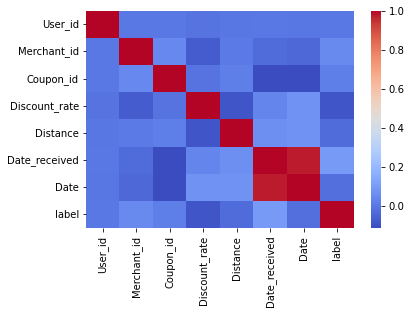

In [39]:
sns.heatmap(data.corr(), cmap='coolwarm')

In [ ]:
print(data['label'].value_counts())

可以看到样本数据并不均匀，在这里没有进行处理直接训练了，可能以后会优化这里的代码，留个坑~

In [35]:
y_data = data['label']
x_data = data.drop(columns=['label'])

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)
print(x_train.shape, x_test.shape)

(53732, 7) (13433, 7)


In [49]:
model = DecisionTreeClassifier(max_depth=5, random_state=1)

In [56]:
model.fit(x_train, y_train)
accuracy_score(y_test, model.predict(x_test))

0.9335219236209336

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.91      0.64      0.75      2096
           1       0.94      0.99      0.96     11337

    accuracy                           0.93     13433
   macro avg       0.92      0.81      0.86     13433
weighted avg       0.93      0.93      0.93     13433



Other criterion options

In [61]:
model2 = DecisionTreeClassifier(criterion='entropy', random_state=1, max_depth=5)
model2.fit(x_test, y_test)
accuracy_score(y_test, model2.predict(x_test))

0.9265242313705054